## Lab: PRINCIPAL COMPONENT ANALYSIS

In [1]:
import numpy as np
import matplotlib.pyplot as plt



## Étape 1 - Chargement des données

In [3]:
# Chargement des données
data = np.loadtxt("/Users/hafsaredouane/Downloads/Lecture, exercises, and lab-20250325/Lab/data_pca.txt")
X = data  # I x N, ici N=2

## Étape 2 - Centrage des données

In [4]:
# Étape 1 : moyenne
M = np.mean(X, axis=0)

In [5]:
# Étape 2 : centrage
X_centered = X - M

## Étape 3 - Matrice de covariance

In [6]:
# Étape 3 : matrice de covariance
Sigma = np.cov(X_centered, rowvar=False)

## Étape 4 - Valeurs/vecteurs propres

In [7]:
# Étape 4 : vecteurs/vecteurs propres
eigenvalues, eigenvectors = np.linalg.eigh(Sigma)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvalues = eigenvalues[sorted_indices]

## Étape 5 - Réduction de dimension

In [8]:
# Choix de P=1 pour visualisation en 1D
P = 1
U_P = eigenvectors[:, :P]

# Étape 5 : projection sur l'espace réduit
Y_tilde = X_centered @ U_P  # I x P

## Étape 6 - Projection dans l’espace original (N-dim)

In [9]:
# Étape 6 : représentation de Ỹ dans l'espace original (N-dim)
Y_tilde_N = Y_tilde @ U_P.T  # I x N

## Étape 7 - Reconstruction (X̂)

In [10]:

# Étape 7 : reconstruction
X_hat = Y_tilde_N + M  # I x N

## Visualisation
**Données centrées + vecteur propre + Ỹ**

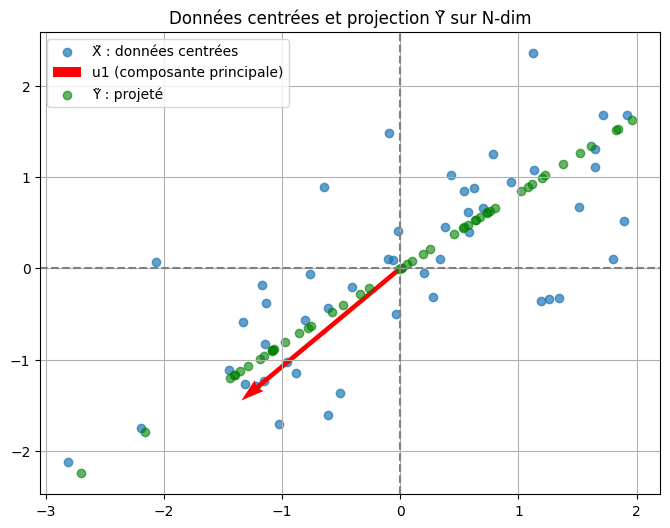

In [11]:
# Visualisation : données centrées + composantes principales + Ỹ
plt.figure(figsize=(8, 6))
plt.scatter(X_centered[:, 0], X_centered[:, 1], label="X̃ : données centrées", alpha=0.7)
origin = np.zeros((2,))
for i in range(P):
    plt.quiver(*origin, *U_P[:, i], scale=3, color='red', label=f"u{i+1} (composante principale)")
plt.scatter(Y_tilde_N[:, 0], Y_tilde_N[:, 1], label="Ỹ : projeté", color='green', alpha=0.6)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.legend()
plt.title("Données centrées et projection Ỹ sur N-dim")
plt.grid()

**Données originales + reconstruction X̂**

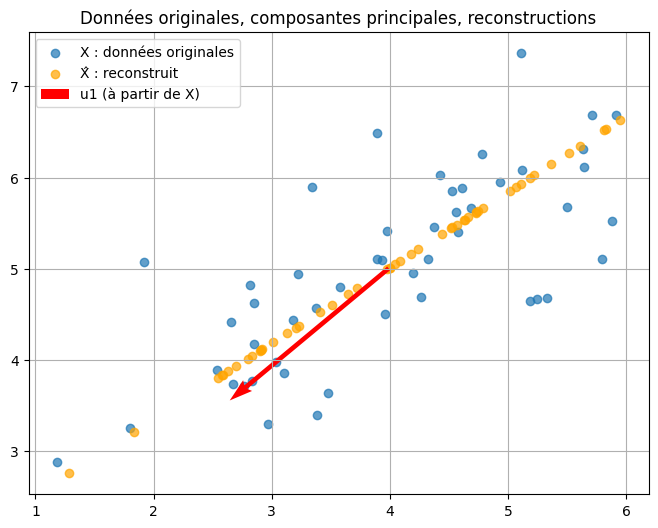

In [12]:

# Deuxième figure : données originales + composantes principales + reconstruction
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="X : données originales", alpha=0.7)
plt.scatter(X_hat[:, 0], X_hat[:, 1], label="X̂ : reconstruit", color='orange', alpha=0.7)
for i in range(P):
    plt.quiver(*M, *U_P[:, i], scale=3, color='red', label=f"u{i+1} (à partir de X)")
plt.legend()
plt.title("Données originales, composantes principales, reconstructions")
plt.grid()
plt.show()